<a href="https://colab.research.google.com/github/ArohiniAshokan/CNN_CIFAR10/blob/main/cifar_10_tf_Keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **CIFAR-10 dataset** consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#loading dataset
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()  # x - images and y - corresponding labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
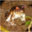

In [ ]:
x_train[0]

In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train[:5]  # this is 2d , so need to reshape to 1d

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=['airplane',"automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[0]]

'frog'

Text(0.5, 0, 'ship')

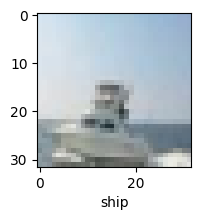

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(x_train[100])
plt.xlabel(classes[y_train[100]])

In [ ]:
# normalizing
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train[0]

array([[[0.07182773, 0.09722503, 0.15002467],
        [0.05555073, 0.08510671, 0.1680591 ],
        [0.06416572, 0.08557414, 0.15041218],
        ...,
        [0.19738931, 0.2065452 , 0.30386149],
        [0.20651145, 0.21914754, 0.33373633],
        [0.20868805, 0.22118572, 0.32022806]],

       [[0.01947871, 0.03136291, 0.04762688],
        [0.        , 0.        , 0.        ],
        [0.02309966, 0.01426236, 0.        ],
        ...,
        [0.15366383, 0.1376968 , 0.15474428],
        [0.16167672, 0.14551397, 0.16359624],
        [0.17202664, 0.15518676, 0.17721359]],

       [[0.03043548, 0.0376355 , 0.05000822],
        [0.02067004, 0.01295102, 0.        ],
        [0.0628824 , 0.04813545, 0.02798366],
        ...,
        [0.14741733, 0.13143786, 0.14067662],
        [0.16303535, 0.14726715, 0.16359624],
        [0.15369593, 0.13021418, 0.13057843]],

       ...,

       [[0.25322319, 0.26658477, 0.22860901],
        [0.25966738, 0.28307232, 0.12697798],
        [0.25409624, 0

Building ANN to check the result

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
ann=Sequential()

ann.add(Flatten())    # 32*32*3 = 3072
ann.add(Dense(3000,activation='relu'))
ann.add(Dense(1000,activation='relu'))
ann.add(Dense(10,activation='softmax'))



In [ ]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# if y is like [0 0 0 0 0 0 1 0 0 0], we should use loss= 'categorical_crossentropy' but here y is like y = 6 like that so use sparse_categorical_crossentropy


In [ ]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 121s 77ms/step - loss: 2.0899 - accuracy: 0.2520
Epoch 2/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.9568 - accuracy: 0.3100
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8803 - accuracy: 0.3404
Epoch 4/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.8182 - accuracy: 0.3631
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.7672 - accuracy: 0.3834


So even after 5 epochs , accuracy is only 0.38 with ANN

**Building CNN**

In [ ]:
from keras.layers import Conv2D,MaxPooling2D
cnn=Sequential()

cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))   # pool_size - (2,2) ie size of the window over which to take the maximum

cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)   # each epoch involves iterating through the dataset in batches (we can see this -left side below Epoch)

Epoch 1/10
1563/1563 [==============================] - 57s 35ms/step - loss: 1.6646 - accuracy: 0.4046
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.2827 - accuracy: 0.5536
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1379 - accuracy: 0.6051
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0516 - accuracy: 0.6335
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9862 - accuracy: 0.6601
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9338 - accuracy: 0.6784
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8871 - accuracy: 0.6941
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8403 - accuracy: 0.7114
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8053 - accuracy: 0.7222
Epoch 10/10
1563/1563 [==============================] - 51s 33m

With CNN, at the end 5 epochs, accuracy was at around 60% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
loss, accuracy =cnn.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 3s 11ms/step - loss: 0.9749 - accuracy: 0.6720
Test Loss: 0.9749101400375366
Test Accuracy: 0.671999990940094


In [ ]:
y_pred=cnn.predict(x_test)
y_pred

313/313 [==============================] - 4s 13ms/step


array([[7.85202079e-04, 1.42718945e-05, 5.93378674e-03, ...,
        1.00215478e-03, 2.51118676e-03, 2.03361793e-04],
       [3.67909856e-03, 5.09573936e-01, 1.36133851e-04, ...,
        5.20360982e-06, 4.83612537e-01, 2.10553361e-03],
       [8.14989656e-02, 1.01219572e-01, 4.04800521e-03, ...,
        5.89520764e-03, 7.50086188e-01, 3.46582048e-02],
       ...,
       [1.37445813e-05, 1.04590178e-07, 2.40419328e-01, ...,
        4.65475060e-02, 4.03337108e-05, 6.81382444e-05],
       [1.26736268e-01, 8.00264955e-01, 5.27144782e-03, ...,
        2.66883732e-03, 6.10557245e-03, 5.68042137e-03],
       [2.87007379e-06, 4.08545338e-06, 1.36897515e-03, ...,
        9.38170731e-01, 5.90780792e-06, 1.94078007e-06]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(y_pred[0])

3

In [ ]:

y_pred_classes=[np.argmax(i) for i in y_pred]
print(y_pred_classes[:20])

[3, 1, 8, 0, 6, 6, 1, 6, 3, 1, 4, 9, 5, 7, 9, 6, 5, 5, 8, 6]


In [ ]:
print(y_test[:20])

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


Text(0.5, 0, 'airplane')

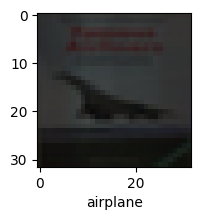

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[3])
plt.xlabel(classes[y_test[3]])

In [ ]:
classes[y_pred_classes[3]]

'airplane'